In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/mushrooms.csv')

In [3]:
X = df.drop('class', axis = 1)

In [4]:
X = pd.get_dummies(X, drop_first = True)

In [5]:
y = df['class']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
param_grid = {'n_estimators': [50, 100],
              'learning_rate': [0.1, 0.05, 0.2],
              'max_depth' :[3, 4, 5]}

In [11]:
gb_model = GradientBoostingClassifier()

In [13]:
grid = GridSearchCV(gb_model, param_grid)

In [14]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [16]:
pred = grid.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, classification_report

In [18]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       444
           p       1.00      1.00      1.00       369

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [19]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [20]:
accuracy_score(y_test, pred)

0.998769987699877

In [21]:
grid.feature_names_in_

array(['cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l', 'odor_m',
       'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_f',
       'gill-spacing_w', 'gill-size_n', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-shape_t', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_c',
       'stalk-color-above-rin

In [22]:
grid.best_estimator_.feature_importances_

array([ 1.71990251e-04,  6.12646206e-16,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.68661908e-03,  3.61221974e-16,  8.28454366e-17,
        0.00000000e+00,  0.00000000e+00,  1.64668344e-16,  0.00000000e+00,
        7.64228446e-17,  0.00000000e+00,  0.00000000e+00,  6.91501003e-18,
        2.38983263e-03,  5.42289998e-02,  1.30525988e-04,  2.14161026e-02,
        2.07370954e-02,  2.81365276e-03,  6.15607813e-01,  3.84602370e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.24568118e-02,
        1.19718738e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.47436470e-17,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  5.01178431e-04,  1.28915407e-01,  5.43593453e-03,
        2.24312735e-02,  2.95999592e-04,  0.00000000e+00,  0.00000000e+00,
        9.90406460e-06,  0.00000000e+00,  4.36031436e-02,  2.65851805e-07,
        0.00000000e+00,  

In [23]:
feat_import = grid.best_estimator_.feature_importances_

In [26]:
imp_feat = pd.DataFrame(data = feat_import, columns = ['Importance'], index = X.columns)

In [27]:
imp_feat

,Importance
cap-shape_c,1.719903e-04
cap-shape_f,6.126462e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,0.000000e+00
...,...
habitat_l,0.000000e+00
habitat_m,0.000000e+00
habitat_p,0.000000e+00
habitat_u,8.286784e-18


In [28]:
imp_feat = imp_feat[imp_feat['Importance'] > 0.005]

In [29]:
imp_feat = imp_feat.sort_values('Importance')

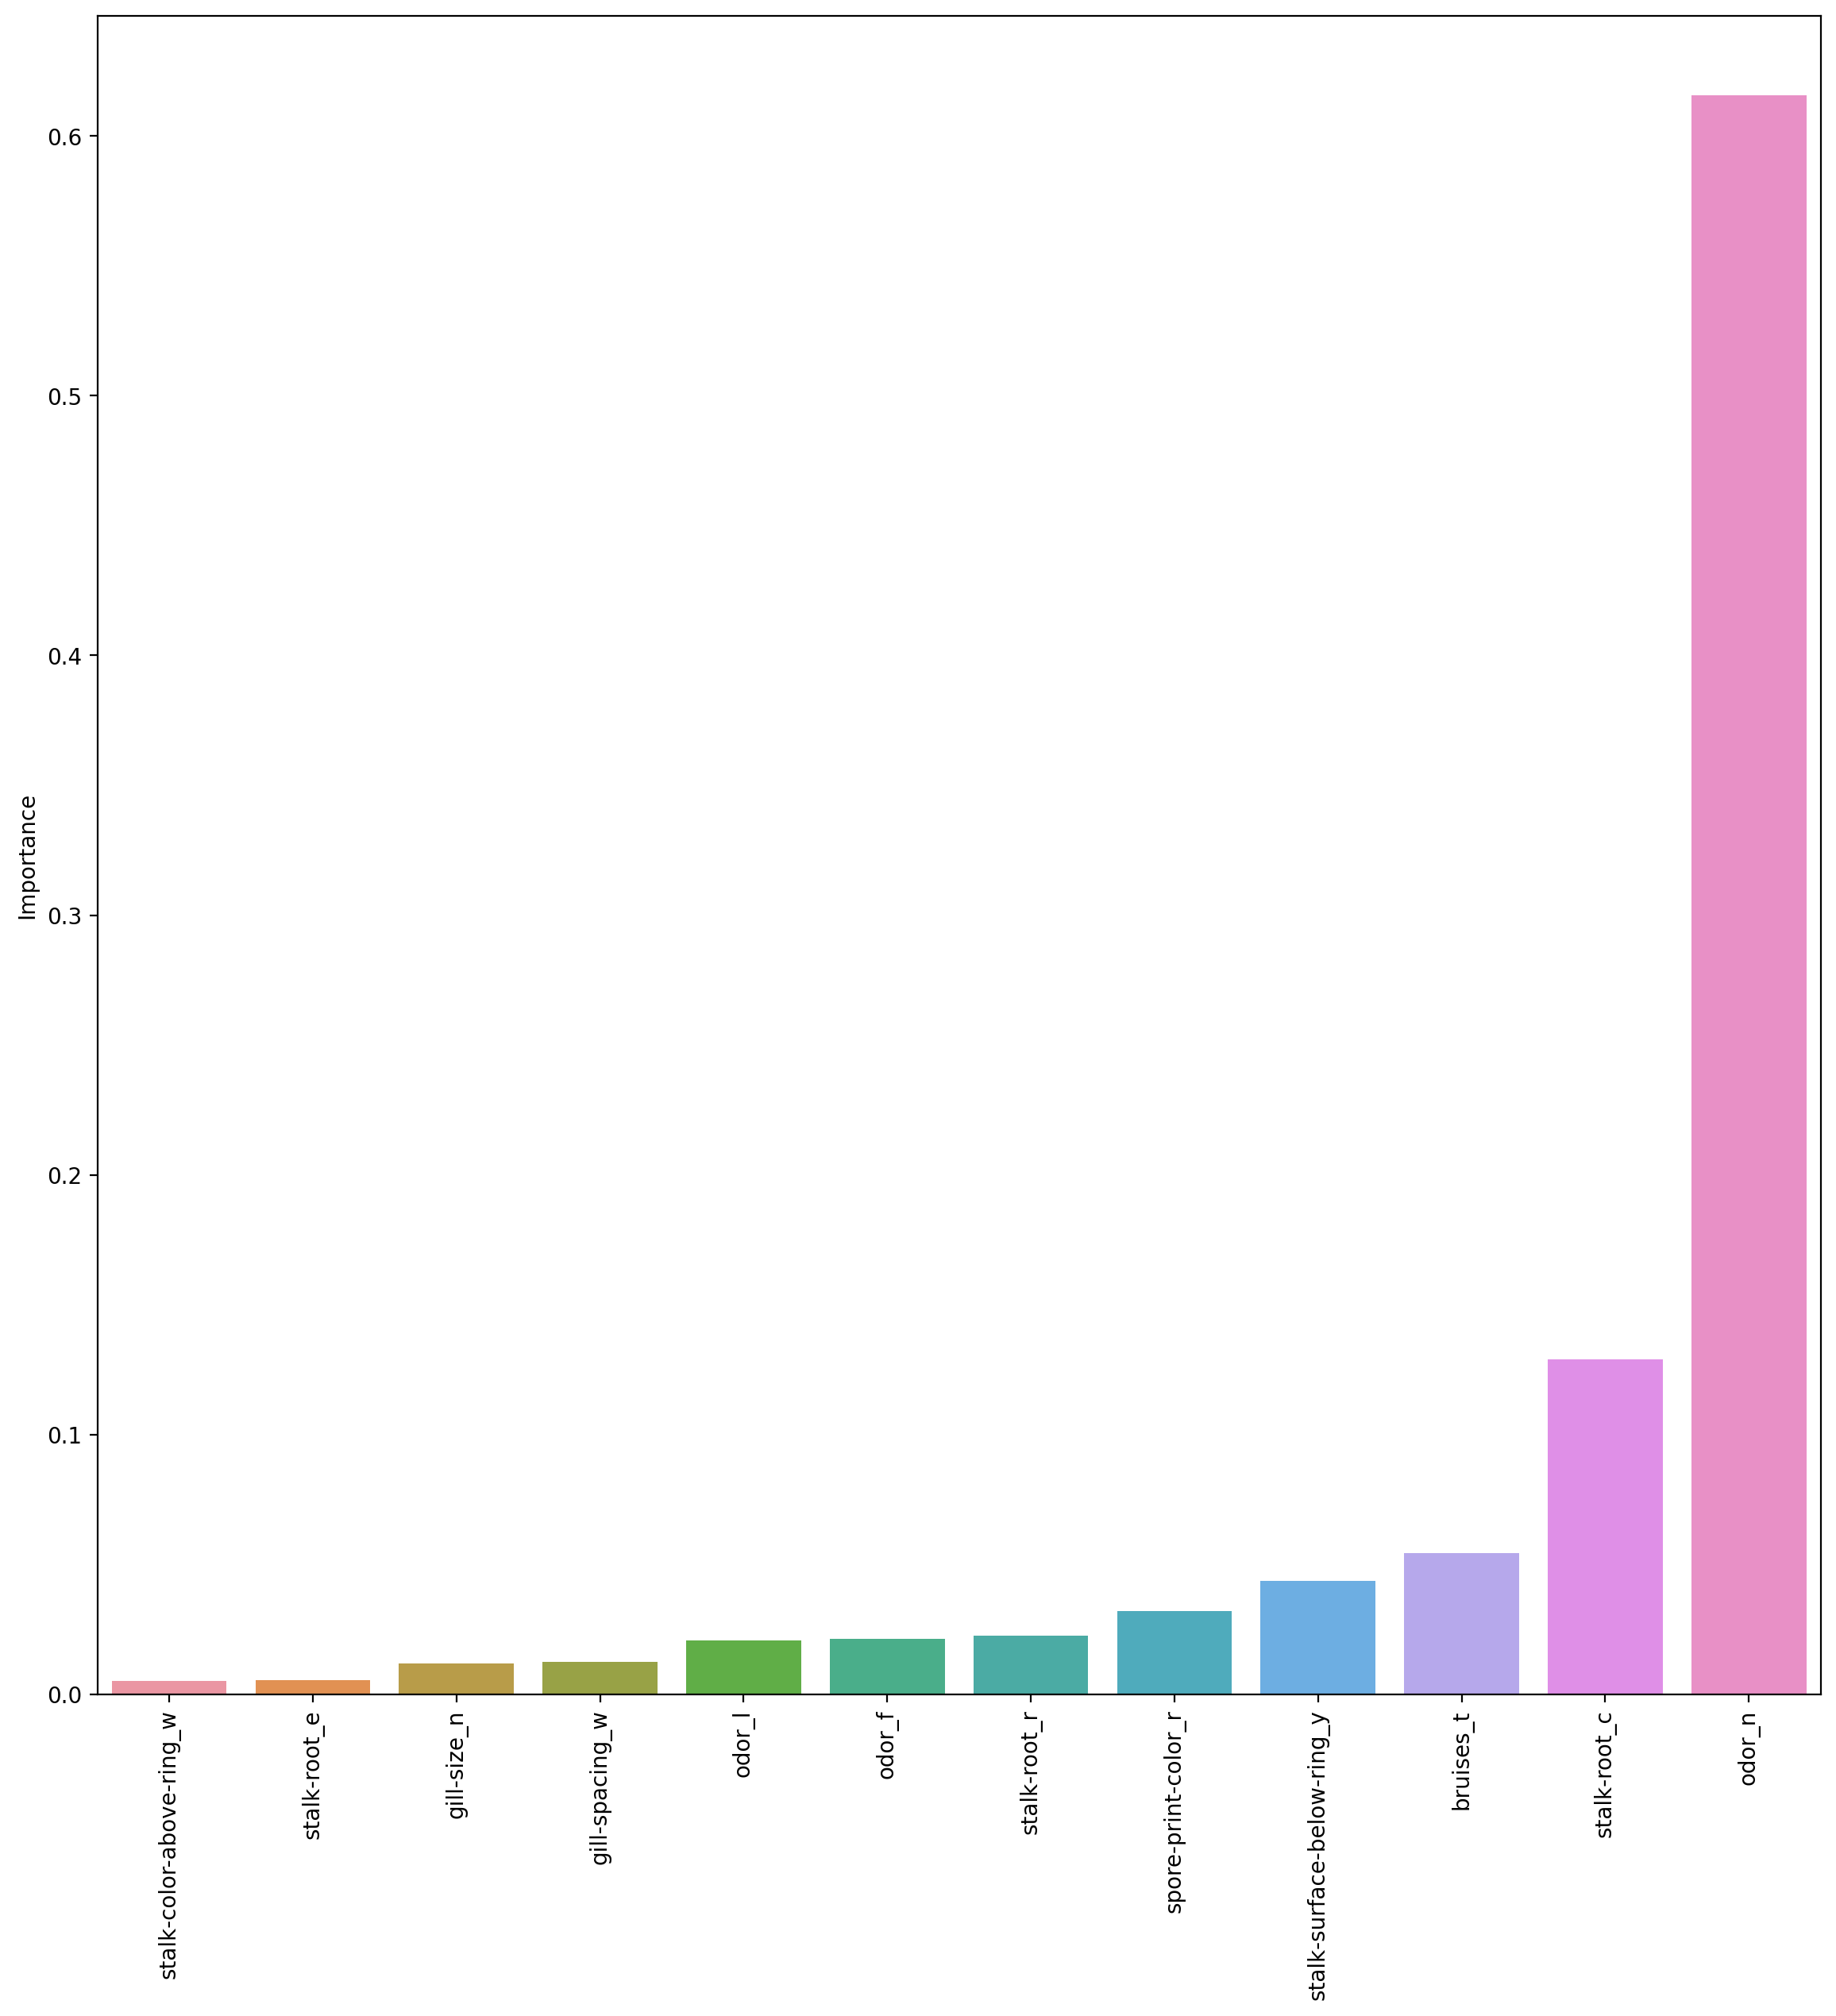

In [31]:
plt.figure(figsize = (14,14), dpi = 200)
sns.barplot(data = imp_feat, x = imp_feat.index, y = 'Importance')
plt.xticks(rotation = 90);